In [47]:
import sys
sys.path.append('../src/')
from tqdm import tqdm
import pandas as pd
import wandb
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [48]:

api = wandb.Api()
entity, project = "ajzero", "AlphaZero"

# tags = ['2024-04-12-15-31-26']
# filters = {"tags": {"$in": tags}}
tags = ["2024-05-21-10-40-41", "2024-05-21-11-11-16"]
filters = {"tags": {"$in": tags}, "state": "finished"}
runs = api.runs(entity + "/" + project, filters=filters)
runs

<Runs ajzero/AlphaZero>

In [49]:
data = []
for run in tqdm(runs):
    summary = run.summary._json_dict
    config = run.config
    summary.update(config)
    data.append(summary)

df = pd.DataFrame(data)

# filter out runs with Evaluation/Mean_Returns == -100
df = df[df['Evaluation/Mean_Returns'] != -100]

ncols, nrows = df["ncols"][0], 6
df

100%|██████████| 16/16 [00:00<00:00, 41221.66it/s]


,Evaluation/Mean_Returns,Evaluation/Mean_Discounted_Returns,_step,Evaluation/Returns,Evaluation/Entropies,Evaluation/Timesteps,Evaluation/Discounted_Returns,Evaluation/Mean_Entropy,_runtime,trajectories,...,policy_loss_weight,sample_batch_ratio,tree_value_transform,observation_embedding,regularization_weight,root_selection_policy,episodes_per_iteration,tree_evaluation_policy,replay_buffer_multiplier,selection_value_transform
0,-77.019997,-77.019997,0,"{'_type': 'histogram', 'bins': [-100, -98.8125...","{'values': [1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0...","{'bins': [24, 25.1875, 26.375, 27.5625, 28.75,...","{'_type': 'histogram', 'values': [44, 0, 1, 0,...",0.904716,319.829380,"[[60, 48, 36, 24, 25, 24, 25, 24, 24, 25, 24, ...",...,0.3,4,identity,coordinate,0.000001,UCT,6,visit,15,identity
1,-53.700001,-53.700001,0,"{'_type': 'histogram', 'bins': [-100, -98.7187...","{'bins': [0.8822803497314453, 0.88331937789916...","{'values': [3, 4, 2, 8, 1, 2, 2, 2, 1, 1, 3, 3...","{'values': [14, 0, 0, 0, 0, 1, 1, 0, 0, 2, 1, ...",0.922697,111.523595,"[[60, 48, 36, 36, 36, 36, 24, 25, 26, 27, 28, ...",...,0.3,4,identity,coordinate,0.000001,UCT,6,visit,15,identity
2,-22.260000,-22.260000,0,"{'_type': 'histogram', 'bins': [-38, -37.64062...","{'_type': 'histogram', 'bins': [0.887077510356...","{'_type': 'histogram', 'bins': [15, 15.359375,...","{'bins': [-38, -37.640625, -37.28125, -36.9218...",0.927978,27.203285,"[[60, 48, 48, 36, 37, 36, 37, 38, 39, 40, 41, ...",...,0.3,4,identity,coordinate,0.000001,UCT,6,visit,15,identity
3,-20.580000,-20.580000,0,"{'_type': 'histogram', 'bins': [-36, -35.67187...","{'_type': 'histogram', 'bins': [0.940668106079...","{'values': [10, 0, 0, 7, 0, 0, 12, 0, 0, 2, 0,...","{'_type': 'histogram', 'bins': [-36, -35.67187...",0.960534,16.739793,"[[60, 48, 48, 36, 36, 36, 48, 48, 49, 37, 38, ...",...,0.3,4,identity,coordinate,0.000001,UCT,6,visit,15,identity
4,-99.080002,-99.080002,0,"{'_type': 'histogram', 'bins': [-100, -98.8437...","{'values': [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","{'_type': 'histogram', 'bins': [26, 27.15625, ...","{'values': [98, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.994515,411.999037,"[[60, 48, 36, 24, 36, 36, 24, 25, 26, 27, 28, ...",...,0.3,4,identity,coordinate,0.000001,UCT,6,visit,15,identity
5,-24.850000,-24.850000,0,"{'_type': 'histogram', 'bins': [-44, -43.60937...","{'values': [1, 0, 1, 1, 1, 0, 0, 0, 1, 3, 1, 1...","{'_type': 'histogram', 'values': [7, 0, 2, 0, ...","{'_type': 'histogram', 'bins': [-44, -43.60937...",0.665805,105.959580,"[[60, 48, 36, 24, 12, 13, 14, 15, 16, 17, 18, ...",...,0.3,4,identity,coordinate,0.000001,UCT,6,visit,15,identity
6,-27.879999,-27.879999,0,"{'_type': 'histogram', 'bins': [-43, -42.65625...","{'values': [1, 1, 0, 1, 0, 0, 0, 1, 3, 0, 3, 1...","{'_type': 'histogram', 'bins': [21, 21.34375, ...","{'bins': [-43, -42.65625, -42.3125, -41.96875,...",0.582897,114.807848,"[[60, 48, 36, 24, 24, 24, 24, 12, 12, 13, 14, ...",...,0.3,4,identity,coordinate,0.000001,UCT,6,visit,15,identity
7,-35.509998,-35.509998,0,"{'bins': [-91, -89.875, -88.75, -87.625, -86.5...","{'bins': [0.9831497669219971, 0.98331958055496...","{'_type': 'histogram', 'bins': [19, 20.125, 21...","{'_type': 'histogram', 'values': [1, 0, 0, 0, ...",0.988916,79.979197,"[[60, 48, 36, 37, 36, 36, 24, 25, 26, 27, 28, ...",...,0.3,4,identity,coordinate,0.000001,UCT,6,visit,15,identity
8,-23.530001,-23.530001,0,"{'bins': [-35, -34.71875, -34.4375, -34.15625,...","{'_type': 'histogram', 'bins': [0.638475894927...","{'bins': [17, 17.28125, 17.5625, 17.84375, 18....","{'_type': 'histogram', 'bins': [-35, -34.71875...",0.718257,51.547072,"[[60, 48, 36, 24, 24, 24, 36, 24, 36, 36, 36, ...",...,0.3,4,identity,coordinate,0.000001,UCT,6,visit,15,identity
9,-26.459999,-26.459999,0,"{'_type': 'histogram', 'bins': [-41, -40.65625...","{'bins': [0.5639885067939758, 0.56742727756500...","{'_type': 'histogram', 'bins': [19, 19.34375, ...","{'_type': 'histogram', 'bins': [-41, -40.65625...",0.661471,54.552236,"

In [50]:
# filter out 128 planning budget
# Assuming 'df' is your DataFrame
df['policy_combination'] = df['tree_evaluation_policy'] + "+" + df['selection_policy']
# Define the policy combination renaming mapping
policy_combination_mapping = {
    'mvc+PolicyUCT': 'MVC+MVCUCT',
    'mvc+UCT': 'MVC+UCT',
    'visit+UCT': 'Visit+UCT'
}

# Rename the policy combinations in the DataFrame
df['policy_combination'] = df['policy_combination'].map(policy_combination_mapping)

# Group the DataFrame by both 'puct_c' and 'planning_budget'
grouped = df.groupby(['puct_c', 'planning_budget'])['trajectories']


# Aggregate the trajectories lists within each group
aggregated_trajectories = grouped.sum()
aggregated_trajectories


puct_c  planning_budget
0.01    16                 [[60, 48, 48, 48, 48, 48, 49, 37, 38, 39, 40, ...
        32                 [[60, 48, 36, 36, 36, 36, 36, 36, 36, 36, 36, ...
        64                 [[60, 48, 36, 24, 25, 24, 25, 26, 27, 26, 27, ...
        128                [[60, 48, 36, 24, 24, 24, 24, 12, 12, 13, 14, ...
1.00    16                 [[60, 48, 48, 48, 49, 37, 38, 39, 40, 41, 42, ...
        32                 [[60, 48, 36, 37, 38, 26, 27, 28, 29, 30, 31, ...
        64                 [[60, 48, 36, 24, 24, 24, 36, 24, 36, 36, 36, ...
        128                [[60, 48, 36, 24, 12, 13, 14, 15, 16, 17, 18, ...
10.00   16                 [[60, 48, 48, 36, 36, 36, 48, 48, 49, 37, 38, ...
        32                 [[60, 48, 48, 36, 37, 36, 37, 38, 39, 40, 41, ...
        64                 [[60, 48, 36, 36, 36, 36, 24, 25, 26, 27, 28, ...
        128                [[60, 48, 36, 24, 25, 24, 25, 24, 24, 25, 24, ...
100.00  16                 [[60, 48, 60, 48, 48, 48,

In [59]:
# remove all trajectories with a length of 100
print(aggregated_trajectories.apply(lambda x: len(x)).sum())
filtered_aggregated_trajectories = aggregated_trajectories # .apply(lambda x: [traj for traj in x if len(traj) != 100])
# check the total number of trajectories
print(filtered_aggregated_trajectories.apply(lambda x: len(x)).sum())
# sort filtered_aggregated_trajectories by puct_c
filtered_aggregated_trajectories

1600
1600


puct_c  planning_budget
0.01    16                 [[60, 48, 48, 48, 48, 48, 49, 37, 38, 39, 40, ...
        32                 [[60, 48, 36, 36, 36, 36, 36, 36, 36, 36, 36, ...
        64                 [[60, 48, 36, 24, 25, 24, 25, 26, 27, 26, 27, ...
        128                [[60, 48, 36, 24, 24, 24, 24, 12, 12, 13, 14, ...
1.00    16                 [[60, 48, 48, 48, 49, 37, 38, 39, 40, 41, 42, ...
        32                 [[60, 48, 36, 37, 38, 26, 27, 28, 29, 30, 31, ...
        64                 [[60, 48, 36, 24, 24, 24, 36, 24, 36, 36, 36, ...
        128                [[60, 48, 36, 24, 12, 13, 14, 15, 16, 17, 18, ...
10.00   16                 [[60, 48, 48, 36, 36, 36, 48, 48, 49, 37, 38, ...
        32                 [[60, 48, 48, 36, 37, 36, 37, 38, 39, 40, 41, ...
        64                 [[60, 48, 36, 36, 36, 36, 24, 25, 26, 27, 28, ...
        128                [[60, 48, 36, 24, 25, 24, 25, 24, 24, 25, 24, ...
100.00  16                 [[60, 48, 60, 48, 48, 48,

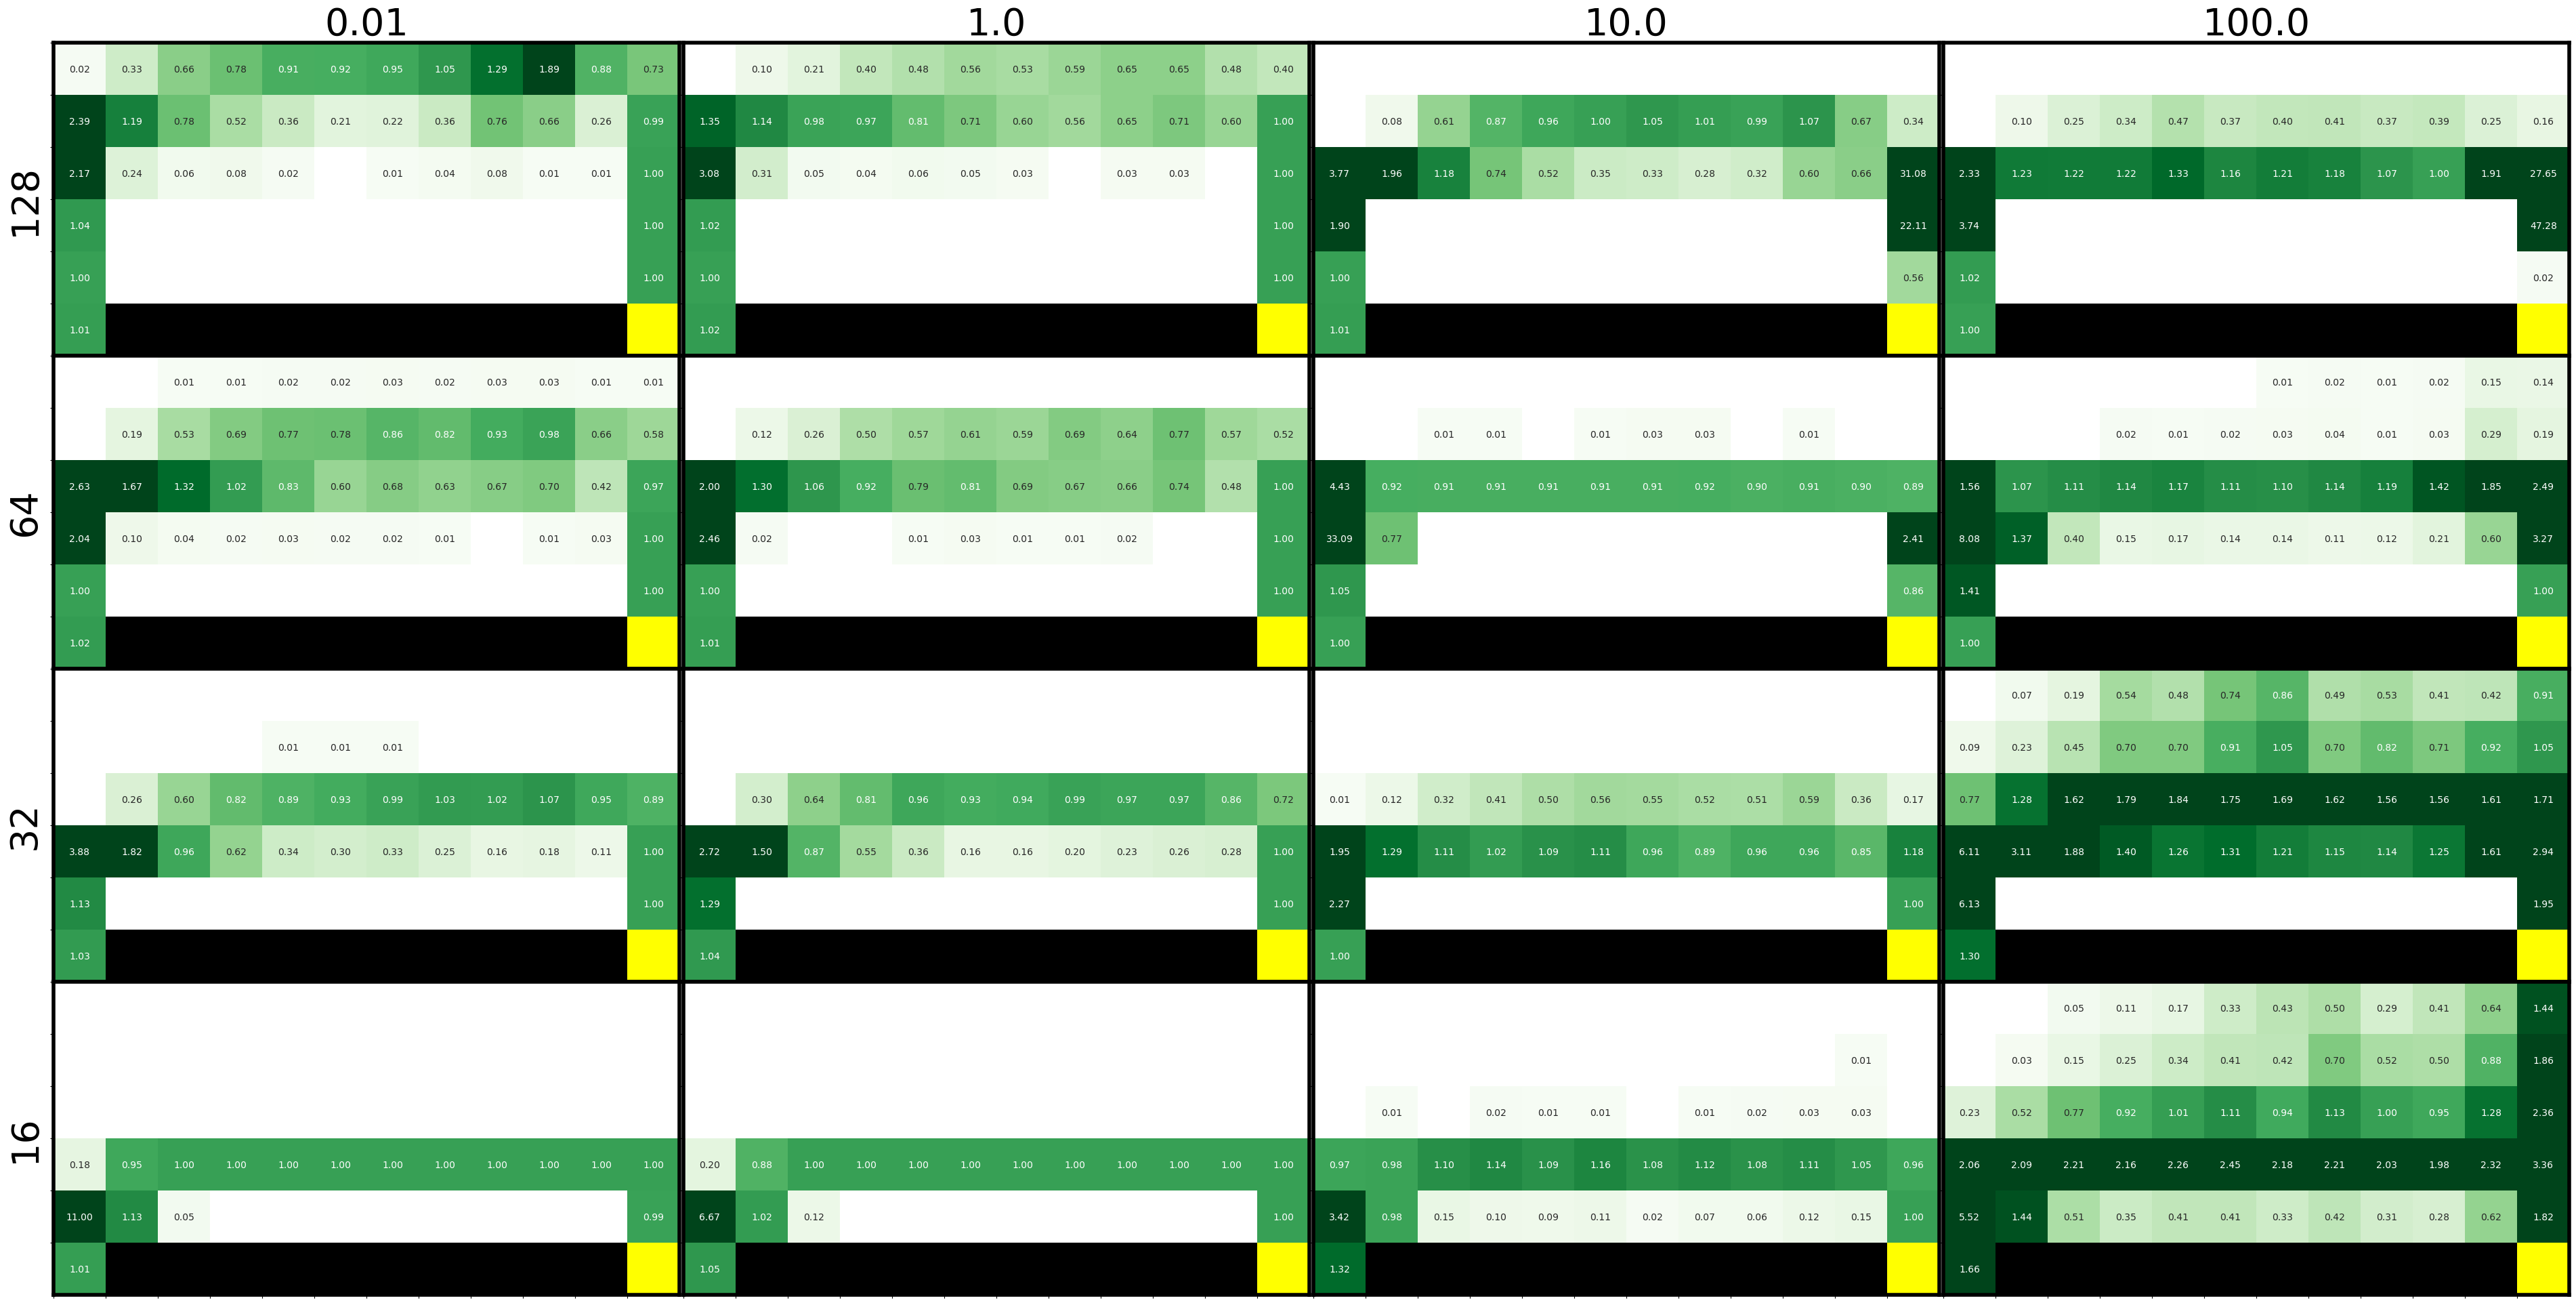

In [62]:

import matplotlib.colors as colors
def obs_to_cords(state, ncols):
    row, col = divmod(state, ncols)
    return row, col

def calculate_density(trajectories, ncols, nrows):
    density = np.zeros((nrows, ncols))
    for trajectory in trajectories:
        for state in trajectory:
            row, col = obs_to_cords(state, ncols)
            density[row, col] += 1
    return density
# Determine the number of unique policy combinations and planning budgets
n_policies = len(df['puct_c'].unique())
n_budgets = len(df['planning_budget'].unique())

# Prepare the plot
fig, axs = plt.subplots(n_budgets, n_policies, figsize=(ncols * n_policies, nrows * n_budgets))

# Cliff and goal state coordinates
cliff_coords = [(nrows - 1, col) for col in range(1, ncols - 1)]
goal_coord = (nrows - 1, ncols - 1)

# Plot each subgroup
for (puct_c, planning_budget), trajectories in filtered_aggregated_trajectories.items():
    i = df['planning_budget'].unique().tolist().index(planning_budget)
    j = sorted(df['puct_c'].unique().tolist()).index(puct_c)
    density = calculate_density(trajectories, ncols, nrows) / len(trajectories)

    # Set cliff and goal states to np.nan to hide their annotations
    for (row, col) in cliff_coords:
        density[row, col] = np.nan  # Remove numbers from the cliff cells
    goal_row, goal_col = goal_coord
    density[goal_row, goal_col] = np.nan  # Remove numbers from the goal cell

    if n_policies == 1:
        ax = axs[i]
    elif n_budgets == 1:
        ax = axs[j]
    else:
        ax = axs[i, j]

    # Create a custom colormap to highlight cliff and goal
    cmap = sns.color_palette("Greens", as_cmap=True)

    # Mask the 0.0 entries by setting them to NaN
    masked_density = density.copy()
    masked_density[masked_density == 0.0] = np.nan

    # Create a normalization instance with clip=True to ensure values above 1.5 are clipped
    norm = colors.Normalize(vmin=1e-3, vmax=1.5, clip=True)

    # Plot the heatmap
    sns.heatmap(masked_density, ax=ax, cmap=cmap, cbar=False, annot=True, fmt='.2f', mask=np.isnan(masked_density), norm=norm)
    # Use LogNorm for logarithmic color scaling
    # sns.heatmap(density, ax=ax, cmap=cmap, cbar=False, annot=True, fmt='.2f', mask=np.isnan(density), norm=colors.Normalize(1e-3, 1.5, clip=True))

    # Highlight the cliff states with black color
    for (row, col) in cliff_coords:
        ax.add_patch(plt.Rectangle((col, row), 1, 1, fill=True, color='black', lw=0))

    # Highlight the goal state with yellow color
    ax.add_patch(plt.Rectangle((goal_col, goal_row), 1, 1, fill=True, color='yellow', lw=0))

    ax.set_xticks(range(ncols))
    ax.set_yticks(range(nrows))
    ax.set_aspect('equal')  # Set aspect ratio to be equal, making each cell square

    # Set labels for the outer plots with larger font size
    if i == 0:
        ax.set_title(puct_c, fontsize=40)
    if j == 0:
        ax.set_ylabel(f"{planning_budget}", fontsize=40)

# Adjust layout to remove space between subplots
plt.subplots_adjust(wspace=0, hspace=0)

# Add a border around each subplot
for ax in axs.flat:
    for _, spine in ax.spines.items():
        spine.set_visible(True)
        spine.set_linewidth(4)

plt.savefig("outfiles/cliff_heurstic_density.pdf", bbox_inches='tight')
plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


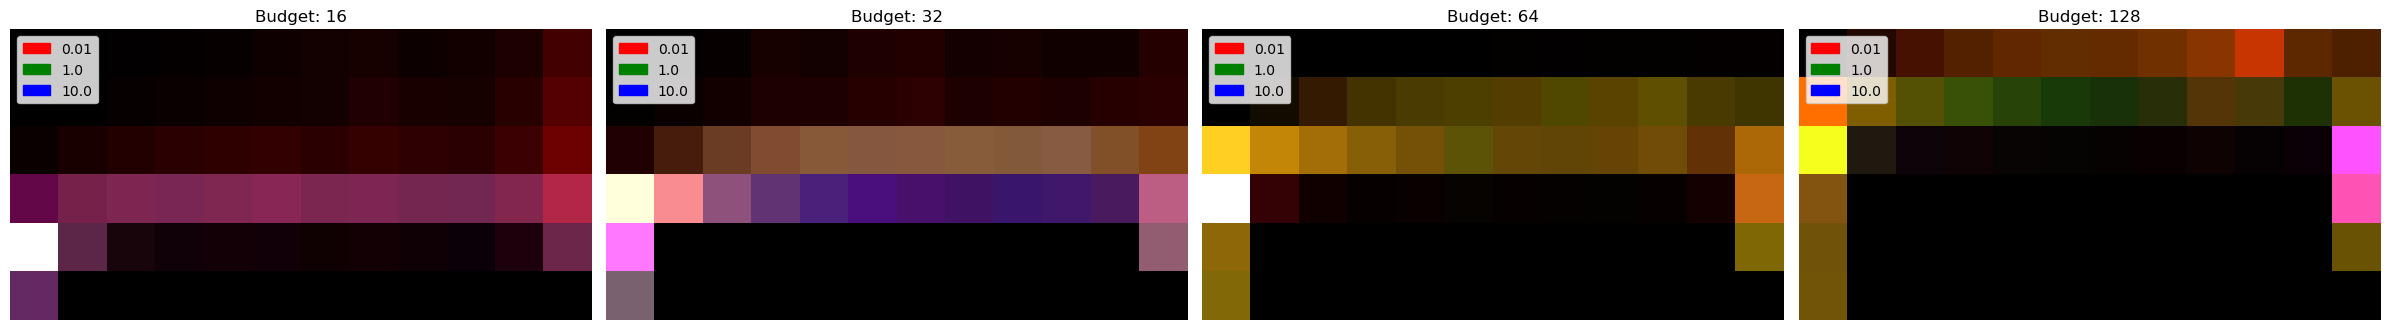

In [57]:
import matplotlib.patches as mpatches
grouped = df.groupby(['planning_budget', 'puct_c'])['trajectories'].sum()


# Determine the number of unique planning budgets
n_budgets = len(grouped.index.get_level_values(0).unique())

# Prepare a single figure with multiple subplots (one for each planning_budget)
fig, axs = plt.subplots(1, n_budgets, figsize=(6 * n_budgets, 6))

# Iterate over each planning_budget and create RGB heatmaps
for idx, (planning_budget, budget_group) in enumerate(grouped.groupby(level=0)):
    rgb_image = np.zeros((nrows, ncols, 3))  # Initialize RGB layers
    colors = ['Red', 'Green', 'Blue']  # Map trajos keys to RGB channels
    channel_colors = {name: color for name, color in zip(budget_group.index.get_level_values(1), colors)}

    # Compute density for each policy combination and assign to RGB channels
    for jdx, ((_, puct_c), trajectories) in enumerate(budget_group.items()):
        density = calculate_density(trajectories, ncols, nrows) / len(trajectories)
        norm_density = density / np.max(density, where=(density!=0), initial=1)  # Normalize avoiding division by zero
        rgb_image[:, :, jdx % 3] += norm_density  # Accumulate in RGB layers, repeating colors if more than 3 policies

    ax = axs[idx] if n_budgets > 1 else axs
    ax.imshow(rgb_image, aspect='equal')
    ax.axis('off')  # Hide grid lines and labels

    # Create a legend
    legend_patches = [mpatches.Patch(color=color, label=name) for name, color in channel_colors.items()]
    ax.legend(handles=legend_patches, loc='upper left')
    ax.set_title(f"Budget: {planning_budget}")

plt.tight_layout()
plt.savefig("outfiles/dist_training_cliff_rgb.pdf")
plt.show()

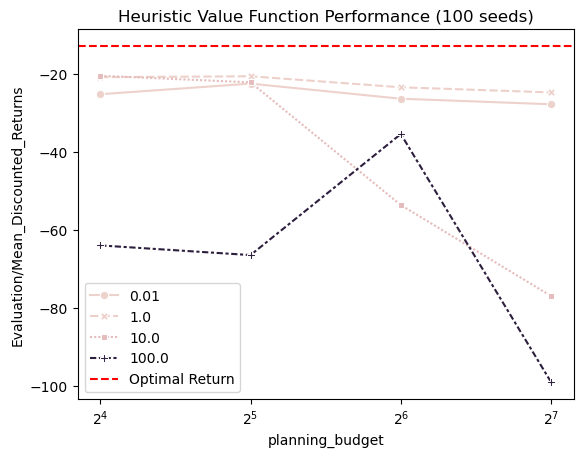

In [58]:
# plot Evaluation/Mean_Discounted_Returns from df vs planning_budget for each policy_combination

sns.lineplot(data=df, x='planning_budget', y='Evaluation/Mean_Discounted_Returns', hue='puct_c', style='puct_c', markers=True)
optimal_value = -13
plt.axhline(optimal_value, color='red', linestyle='--', label='Optimal Return')
# set x axis to log2 scale
plt.xscale('log', base=2)
plt.legend()
plt.title('Heuristic Value Function Performance (100 seeds)')
plt.savefig("outfiles/heuristic_value_function_performance.pdf")
plt.show()
